<a href="https://colab.research.google.com/github/clp2454/QM2/blob/main/group%20project/Correlation_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#Importing the data sets and assigning them each a dataframe
import pandas as pd
import scipy.stats
import numpy as np

# Starting with the cocoa price

cocoa_price_file = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=720&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=PCOCOUSDM&scale=left&cosd=2011-12-01&coed=2024-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=3&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2025-01-11&revision_date=2025-01-11&nd=1990-01-01'
chocolate_price_file = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=960&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=PCU3113531135&scale=left&cosd=2011-12-01&coed=2024-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=3&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2025-01-11&revision_date=2025-01-11&nd=2011-12-01'

# Read data from CSV files
cocoa_price = pd.read_csv(cocoa_price_file)
chocolate_price = pd.read_csv(chocolate_price_file)

# Rename the columns before merging
cocoa_price = cocoa_price.rename(columns={'PCOCOUSDM': 'Cocoa Price'}) #Rename the PCOCOUSDM column to 'Cocoa Price'
chocolate_price = chocolate_price.rename(columns={'PCU3113531135': 'Chocolate Price'}) #Rename the PCU3113531135 column to 'Chocolate Price'

# Merge on the 'Date' column
merged_data = pd.merge(cocoa_price, chocolate_price, on='observation_date', how='inner')

print(cocoa_price.head())
print(chocolate_price.head())

  observation_date  Cocoa Price
0       2011-12-01  2200.605172
1       2012-01-01  2307.761849
2       2012-02-01  2356.239881
3       2012-03-01  2359.251293
4       2012-04-01  2266.782894
  observation_date  Chocolate Price
0       2011-12-01            100.0
1       2012-01-01            101.1
2       2012-02-01            101.2
3       2012-03-01            101.1
4       2012-04-01            101.1


In [34]:
# Finding a correlation using Pearsons correlation coefficient on this dataframe

correlation, p_value = scipy.stats.pearsonr(cocoa_price['Cocoa Price'], chocolate_price['Chocolate Price'])
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

Correlation coefficient: 0.8117477882942772
p-value: 8.416603554141097e-38


These results demonstrate

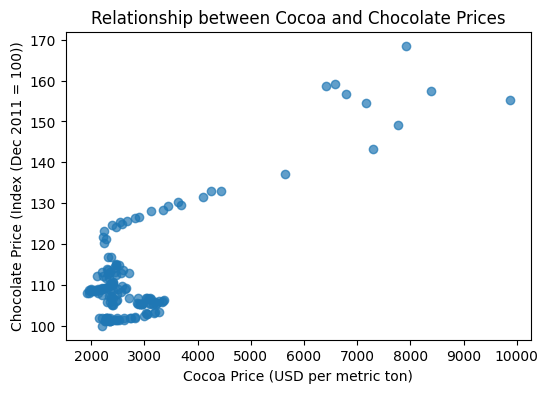

In [37]:
!pip install matplotlib
import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(6, 4))  # Adjust figure size if needed
plt.scatter(merged_data['Cocoa Price'], merged_data['Chocolate Price'], alpha=0.7)  # alpha controls transparency

# Add labels and title
plt.xlabel('Cocoa Price (USD per metric ton)')
plt.ylabel('Chocolate Price (Index (Dec 2011 = 100))')
plt.title('Relationship between Cocoa and Chocolate Prices')

# Display the plot
plt.show()